In [1]:
!pip install pycryptodome

     |████████████████████████████████| 2.0 MB 4.9 MB/s 


# Importing dependencies

In [2]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
#import sounddevice as sd

import random
import string
from Crypto.Cipher import DES3

import IPython.display as ipd
import librosa
import librosa.display

## Taking input

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


Text(0.5, 1.0, 'Original Audio Plot')

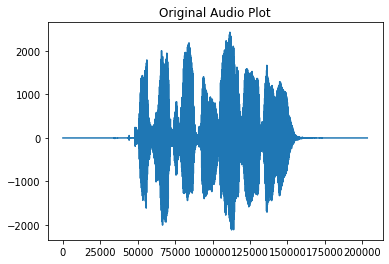

In [4]:
path='/content/drive/MyDrive/data_set/RAVDESS_song/Actor_01/03-02-01-01-01-01-01.wav'
fs, data = wavfile.read(path)
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [5]:
with open(path, 'rb') as fd:
    contents = fd.read()

In [6]:
contents

b'RIFFv\xe9\x06\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80\xbb\x00\x00\x00w\x01\x00\x02\x00\x10\x00FLLR\xcc\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

## Playing that sound

In [7]:
# Original Sound
samples, sample_rate = librosa.load(path)
ipd.Audio(samples, rate=sample_rate)

## Getting ready with DES

In [8]:
from Crypto.Random import get_random_bytes
while True:
  try:
    Key = DES3.adjust_key_parity(get_random_bytes(24))
    #Key = DES3.adjust_Key_parity(get_random_bytes(24))
    break
  except ValueError:
    pass

In [9]:
Key

b'\x98\x92\xe6\x04I#\x10\xbc\x9bL\x1a\xc1\xfe\xf2\xef\xb9\xabg\xfd\xa1\xb6J^\xf4'

In [10]:
def encrypt(msg):
  cipher =DES3.new(Key,DES3.MODE_EAX)
  nonce=cipher.nonce
  ciphertext=cipher.encrypt(msg)
  return nonce,ciphertext

In [11]:
def decrypt(nonce,ciphertext):
   cipher=DES3.new(Key,DES3.MODE_EAX,nonce=nonce)
   plaintext=cipher.decrypt(ciphertext)
   return plaintext

In [12]:
nonce,ciphertext = encrypt(contents)
with open('/content/drive/MyDrive/crypto/encrypted_audio_file.wav', 'wb') as fd:
    fd.write(ciphertext)

In [13]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/crypto/encrypted_audio_file.wav')
ipd.Audio(samples, rate=sample_rate)

#can't access audio file 

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


NoBackendError: ignored

In [14]:
plaintext = decrypt(nonce,ciphertext)
with open('/content/drive/MyDrive/crypto/decrypted_audio_file.wav', 'wb') as fd:
    fd.write(plaintext)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")


A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


In [15]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/crypto/decrypted_audio_file.wav')
ipd.Audio(samples, rate=sample_rate)